In [1]:
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# 加载数据
iris = datasets.load_iris()
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)
# 转换为Dataset数据格式
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test)
# 参数
results = {}
params = {
    'learning_rate': 0.1,
    'lambda_l1': 0.1,
    'lambda_l2': 0.9,
    'max_depth': 1,
    'objective': 'multiclass',  # 目标函数
    'num_class': 3,
    'verbose': -1 
}
# 模型训练
gbm = lgb.train(params, train_data, valid_sets=(validation_data,train_data),valid_names=('validate','train'),evals_result= results)
# 模型预测
y_pred_test = gbm.predict(X_test)
y_pred_data = gbm.predict(X_train)
y_pred_data = [list(x).index(max(x)) for x in y_pred_data]
y_pred_test = [list(x).index(max(x)) for x in y_pred_test]
# 模型评估
print(accuracy_score(y_test, y_pred_test))
print('训练集',f1_score(y_train, y_pred_data,average='macro'))
print('验证集',f1_score(y_test, y_pred_test,average='macro'))

[1]	train's multi_logloss: 0.975355	validate's multi_logloss: 0.984243
[2]	train's multi_logloss: 0.87465	validate's multi_logloss: 0.886391
[3]	train's multi_logloss: 0.789919	validate's multi_logloss: 0.807409
[4]	train's multi_logloss: 0.717762	validate's multi_logloss: 0.737254
[5]	train's multi_logloss: 0.655617	validate's multi_logloss: 0.672786
[6]	train's multi_logloss: 0.601148	validate's multi_logloss: 0.620002
[7]	train's multi_logloss: 0.553614	validate's multi_logloss: 0.570385
[8]	train's multi_logloss: 0.511383	validate's multi_logloss: 0.525175
[9]	train's multi_logloss: 0.474022	validate's multi_logloss: 0.488136
[10]	train's multi_logloss: 0.440625	validate's multi_logloss: 0.451792
[11]	train's multi_logloss: 0.410823	validate's multi_logloss: 0.422107
[12]	train's multi_logloss: 0.384123	validate's multi_logloss: 0.392514
[13]	train's multi_logloss: 0.360052	validate's multi_logloss: 0.368518
[14]	train's multi_logloss: 0.338502	validate's multi_logloss: 0.344112
[1

NameError: name 'f1_score' is not defined

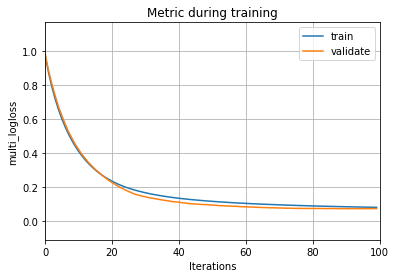

In [2]:
# 有以下曲线可知验证集的损失是比训练集的损失要高，所以模型可以判断模型出现了过拟合
lgb.plot_metric(results)
plt.show()

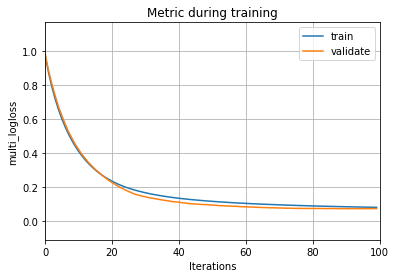

In [3]:
#因此可以尝试将lambda_l2设置为0.9
lgb.plot_metric(results)
plt.show()

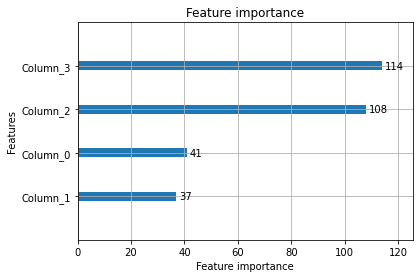

In [4]:
# 绘制重要的特征
lgb.plot_importance(gbm,importance_type = "split")
plt.show()

lightGBM模型在文档推荐学习中讲解十分详细，它是对GBDT模型的优化，相较于GX-boost模型，它采用了直方图法节省了时间，空间，运用单边梯度采样、带深度限制的Leaf-wise的叶子生长策略，过滤了对分析帮助不大的数据